# Hate Speech Detection using Transformers (Deep Learning)

Problem Statement

The term hate speech is understood as any type of verbal, written or behavioural communication that attacks or uses derogatory or discriminatory language against a person or group based on what they are, in other words, based on their religion, ethnicity, nationality, race, colour, ancestry, sex or another identity factor. In this problem, We will take you through a hate speech detection model with Machine Learning and Python.

Hate Speech Detection is generally a task of sentiment classification. So for training, a model that can classify hate speech from a certain piece of tweet can be achieved by training it on a data that is generally used to classify sentiments. So for the task of hate speech detection model, We will use the Twitter tweets to identify tweets containing  Hate speech.









In [36]:
import pandas as pd
import numpy as np
import os
import pickle
from sklearn.preprocessing import LabelEncoder
import torch
import nltk
from nltk.corpus import stopwords
import re
import string
import seaborn as sns
import transformers
import matplotlib.pyplot as plt

import torch.nn as nn
import torch.optim as optim

from nltk.probability import FreqDist
from sklearn.model_selection import train_test_split
from torch.utils.data import Dataset, DataLoader
from torch.utils.data import DataLoader, Dataset

from torch import nn, optim
from torch.utils.data import Dataset, TensorDataset
from wordcloud import WordCloud
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dropout, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
from termcolor import colored
from sklearn.model_selection import StratifiedShuffleSplit

from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
from keras.utils import to_categorical
from keras.models import load_model

from transformers import PreTrainedTokenizerFast
from tensorflow.keras.optimizers import Adam
import tensorflow as tf

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Initialise file paths.
 Here, we are going to initialize the file paths in the drive. These paths will be saved as variables and will house the different folders containing the project code,data files,with subfolders containing models and vectorisers that wil be used for this task

1. General file path for common files, notebook and sub-folder for modelsk

In [37]:
#this is to initialise and print path for the parent folders after "MyDrive",
# Define the path to the directory in my Drive
MYDRIVE_PATH = r"C:\Users\Hp\Hate_Speech_Detection"

# List files in the directory
print('List of files: ', MYDRIVE_PATH)


#initialise and print path containing the train dataset
train_file = os.path.join(MYDRIVE_PATH, 'train.csv')
print('Train file: ', train_file)

train_100_file = os.path.join(MYDRIVE_PATH, 'train_100.csv') #100% file is saved here as train_100.csv
print('Train 100% file: ', train_100_file)

train_50_file = os.path.join(MYDRIVE_PATH, 'train_50.csv') #50% file is saved here as train_50.csv
print('Train 50% file: ', train_50_file)

train_25_file = os.path.join(MYDRIVE_PATH, 'train_25.csv') #25% file is saved here as train_25.csv
print('Train 25% file: ', train_25_file)

#initialise and print path containing the test dataset
test_file = os.path.join(MYDRIVE_PATH, 'test.csv')
print('Test file: ', test_file)


List of files:  C:\Users\Hp\Hate_Speech_Detection
Train file:  C:\Users\Hp\Hate_Speech_Detection\train.csv
Train 100% file:  C:\Users\Hp\Hate_Speech_Detection\train_100.csv
Train 50% file:  C:\Users\Hp\Hate_Speech_Detection\train_50.csv
Train 25% file:  C:\Users\Hp\Hate_Speech_Detection\train_25.csv
Test file:  C:\Users\Hp\Hate_Speech_Detection\test.csv


2. Model_1 File paths

In [38]:
#Model 1 file directories
MODEL_1_DIRECTORY = os.path.join(MYDRIVE_PATH, 'models', '1') # Model 1 parent directory
print('Model 1 directory: ', MODEL_1_DIRECTORY)

MODEL_1_100_DIRECTORY = os.path.join(MODEL_1_DIRECTORY,'100') # Model 1 trained using 100% of train data directory
print('Model 1 directory with 100% data: ', MODEL_1_100_DIRECTORY)

model_1_100_output_test_file = os.path.join(MODEL_1_100_DIRECTORY, 'output_test.csv') # Output file using Model 1 trained using 100% of train data
print('Output file name using model 1 using 100% of train data: ',model_1_100_output_test_file)

MODEL_1_50_DIRECTORY = os.path.join(MODEL_1_DIRECTORY,'50') # Model 1 trained using 50% of train data directory
print('Model 1 directory with 50% data: ', MODEL_1_50_DIRECTORY)

model_1_50_output_test_file = os.path.join(MODEL_1_50_DIRECTORY, 'output_test.csv') # Output file using Model 1 trained using 100% of train data
print('Output file name using model 1 using 50% of train data: ',model_1_50_output_test_file)

MODEL_1_25_DIRECTORY = os.path.join(MODEL_1_DIRECTORY,'25') # Model 1 trained using 25% of train data directory
print('Model 1 directory with 25% data: ', MODEL_1_25_DIRECTORY)

model_1_25_output_test_file = os.path.join(MODEL_1_25_DIRECTORY, 'output_test.csv') # Output file using Model 1 trained using 25% of train data
print('Output file name using model 1 using 25% of train data: ',model_1_25_output_test_file)


Model 1 directory:  C:\Users\Hp\Hate_Speech_Detection\models\1
Model 1 directory with 100% data:  C:\Users\Hp\Hate_Speech_Detection\models\1\100
Output file name using model 1 using 100% of train data:  C:\Users\Hp\Hate_Speech_Detection\models\1\100\output_test.csv
Model 1 directory with 50% data:  C:\Users\Hp\Hate_Speech_Detection\models\1\50
Output file name using model 1 using 50% of train data:  C:\Users\Hp\Hate_Speech_Detection\models\1\50\output_test.csv
Model 1 directory with 25% data:  C:\Users\Hp\Hate_Speech_Detection\models\1\25
Output file name using model 1 using 25% of train data:  C:\Users\Hp\Hate_Speech_Detection\models\1\25\output_test.csv


3. MODEL_2 File Paths

In [39]:
#Model 2 file directories
MODEL_2_DIRECTORY = os.path.join(MYDRIVE_PATH, 'models', '2') # Model 2 parent directory
print('Model 2 directory: ', MODEL_2_DIRECTORY)

MODEL_2_100_DIRECTORY = os.path.join(MODEL_2_DIRECTORY,'100') # Model 2 trained using 100% of train data directory
print('Model 2 directory with 100% data: ', MODEL_2_100_DIRECTORY)

model_2_100_output_test_file = os.path.join(MODEL_2_100_DIRECTORY, 'output_test.csv') # Output file using Model 2 trained using 100% of train data
print('Output file name using model 2 using 100% of train data: ',model_2_100_output_test_file)

MODEL_2_50_DIRECTORY = os.path.join(MODEL_2_DIRECTORY,'50') # Model 2 trained using 100% of train data directory
print('Model 2 directory with 50% data: ', MODEL_2_50_DIRECTORY)

model_2_50_output_test_file = os.path.join(MODEL_2_50_DIRECTORY, 'output_test.csv') # Output file using Model 2 trained using 100% of train data
print('Output file name using model 2 using 50% of train data: ',model_2_50_output_test_file)

MODEL_2_25_DIRECTORY = os.path.join(MODEL_2_DIRECTORY,'25') # Model 2 trained using 25% of train data directory
print('Model 2 directory with 25% data: ', MODEL_2_25_DIRECTORY)

model_2_25_output_test_file = os.path.join(MODEL_2_25_DIRECTORY, 'output_test.csv') # Output file using Model 2 trained using 25% of train data
print('Output file name using model 2 using 25% of train data: ',model_2_25_output_test_file)


Model 2 directory:  C:\Users\Hp\Hate_Speech_Detection\models\2
Model 2 directory with 100% data:  C:\Users\Hp\Hate_Speech_Detection\models\2\100
Output file name using model 2 using 100% of train data:  C:\Users\Hp\Hate_Speech_Detection\models\2\100\output_test.csv
Model 2 directory with 50% data:  C:\Users\Hp\Hate_Speech_Detection\models\2\50
Output file name using model 2 using 50% of train data:  C:\Users\Hp\Hate_Speech_Detection\models\2\50\output_test.csv
Model 2 directory with 25% data:  C:\Users\Hp\Hate_Speech_Detection\models\2\25
Output file name using model 2 using 25% of train data:  C:\Users\Hp\Hate_Speech_Detection\models\2\25\output_test.csv


# Read datasets

In [40]:
#load and view train set
train_df = pd.read_csv(train_file)
train_df.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [41]:
#load and view test set
test_df = pd.read_csv(test_file)
test_df.head()

,id,tweet
0,31963,#studiolife #aislife #requires #passion #dedic...
1,31964,@user #white #supremacists want everyone to s...
2,31965,safe ways to heal your #acne!! #altwaystohe...
3,31966,is the hp and the cursed child book up for res...
4,31967,"3rd #bihday to my amazing, hilarious #nephew..."


# Data Statistics

In [42]:
#check dimension of the data sets
print('the train set contains',train_df.shape[0],'tweets and',train_df['label'].nunique(),'unique labels')
print('the test set contains',test_df.shape[0],'tweets and', 'no label')

the train set contains 31962 tweets and 2 unique labels
the test set contains 17197 tweets and no label


In [43]:
# Check the train Missing Value
train_df.isnull().sum()

id       0
label    0
tweet    0
dtype: int64

In [44]:
# Check the test Missing Value
test_df.isnull().sum()

id       0
tweet    0
dtype: int64

There is no missing values in both train and test datasets

In [45]:
# Extract the Label Feature for Each Class
hate_speech = train_df[train_df['label'] == 1].shape[0]
free_speech = train_df[train_df['label'] == 0].shape[0]
print('Hate Speech =', hate_speech)
print('Free Speech =', free_speech)

Hate Speech = 2242
Free Speech = 29720


In [46]:
# function to create labeled countplot
def perc_countplot(data, feature, perc=False, n=None):
    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))


    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

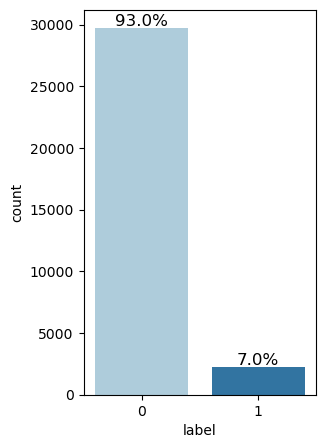

None


In [47]:
#apply function to view percentage distribution of label class in train set
print(perc_countplot(train_df,'label',perc = True,n= None))

From the plots above, we can see that the label variable's distribution is (93% : 7%) for train dataset. However the train dataset is highly imbalanced with respect to the target variable distribution.

# Data Cleaning

In [48]:
# Function to clean data
def clean(data):
    punctuations = string.punctuation

    data.loc[:, 'tweet'] = data['tweet'].str.replace('@USER', '', regex=False)  # Remove mentions (@USER)
    data.loc[:, 'tweet'] = data['tweet'].str.replace('URL', '', regex=False)  # Remove URLs
    data.loc[:, 'tweet'] = data['tweet'].str.replace('&amp', 'and', regex=False)  # Replace ampersand (&) with and
    data.loc[:, 'tweet'] = data['tweet'].str.replace('&lt', '', regex=False)  # Remove &lt
    data.loc[:, 'tweet'] = data['tweet'].str.replace('&gt', '', regex=False)  # Remove &gt
    data.loc[:, 'tweet'] = data['tweet'].str.replace(r'\d+', '', regex=True)  # Remove numbers
    data.loc[:, 'tweet'] = data['tweet'].str.lower()  # Lowercase
    data.loc[:, 'tweet'] = data['tweet'].str.replace(r'\buser\b', '', regex=True)  # Remove the word 'user'

    # Remove punctuations
    for punctuation in punctuations:
        data.loc[:, 'tweet'] = data['tweet'].str.replace(punctuation, '', regex=False)

    data.loc[:, 'tweet'] = data['tweet'].astype(str).apply(
        lambda x: x.encode('ascii', 'ignore').decode('ascii')
    )  # Remove emojis
    data.loc[:, 'tweet'] = data['tweet'].str.strip()  # Trim leading and trailing whitespaces

    # Stopwords removal
    stop_words = set(stopwords.words('english'))
    lemmatizer = WordNetLemmatizer()

    # Lemmetisation
    def tokenize_and_lemmatize(text):
        tokens = word_tokenize(text)  # Tokenize the text
        tokens = [word for word in tokens if word not in stop_words]  # Remove stop words
        tokens = [lemmatizer.lemmatize(word) for word in tokens]  # Lemmatize the tokens
        return tokens

    data['cleaned_tweet'] = data['tweet'].apply(tokenize_and_lemmatize)
    return data



In [49]:
# Clean the tweets
train_df = clean(train_df)
test_df = clean(test_df)

# Transforming cleaned data into a flat list
flat_filtered_train = [item for sublist in train_df['cleaned_tweet'] for item in sublist]
flat_filtered_test = [item for sublist in test_df['cleaned_tweet'] for item in sublist]

# Getting frequency distribution
clean_corpus_freqdist_train = FreqDist(flat_filtered_train)
clean_corpus_freqdist_test = FreqDist(flat_filtered_test)

# Top 20 words in cleaned corpus
print("Top 20 words in the training set:")
print(clean_corpus_freqdist_train.most_common(10))

print("Top 20 words in the testing set:")
print(clean_corpus_freqdist_test.most_common(10))

# Getting count of all unique words in the corpus
total_vocab_train = set(flat_filtered_train)
total_vocab_test = set(flat_filtered_test)

print(f"Number of unique words for train: {len(total_vocab_train)}")
print(f"Number of unique words for test: {len(total_vocab_test)}")


Top 20 words in the training set:
[('day', 2813), ('love', 2774), ('u', 1693), ('happy', 1691), ('life', 1235), ('time', 1234), ('im', 1157), ('like', 1088), ('today', 1086), ('get', 1000)]
Top 20 words in the testing set:
[('love', 1513), ('day', 1457), ('happy', 939), ('u', 906), ('time', 673), ('life', 631), ('im', 610), ('today', 584), ('new', 558), ('get', 536)]
Number of unique words for train: 37175
Number of unique words for test: 24990


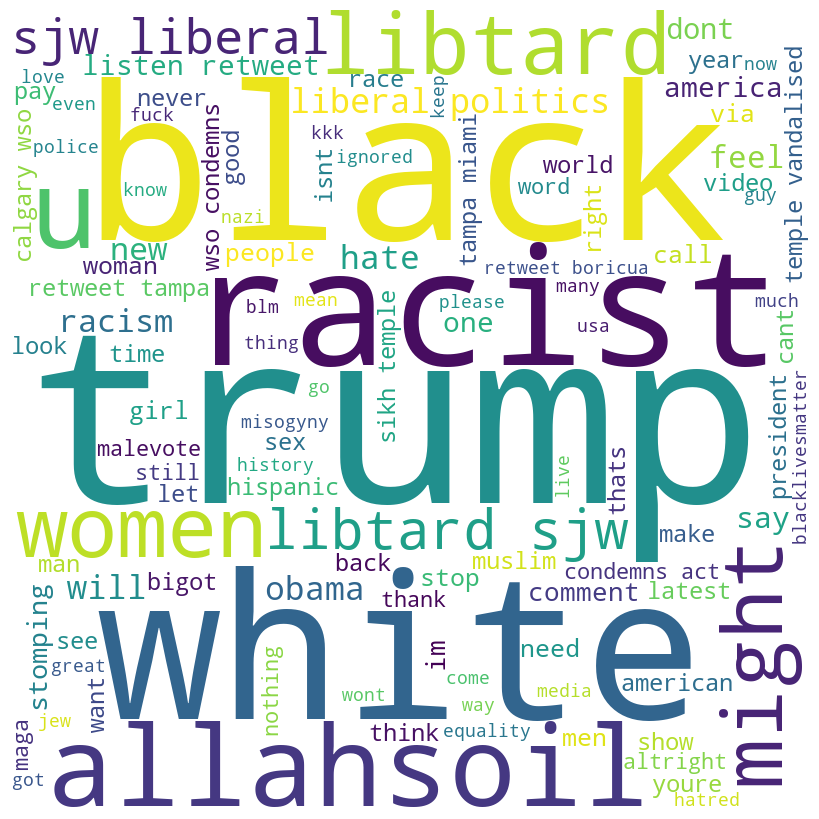

In [16]:
# Implementing Wordcloud
# WordCloud of Hate speech
from wordcloud import STOPWORDS

hate_speech = train_df[train_df['label'] == 1]   
comment_words = ''
stopwords = set(STOPWORDS)
for val in hate_speech.tweet:
     
    #typecaste each val to string
    val = str(val)
 
    #split the value
    tokens = val.split()
     
    #Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

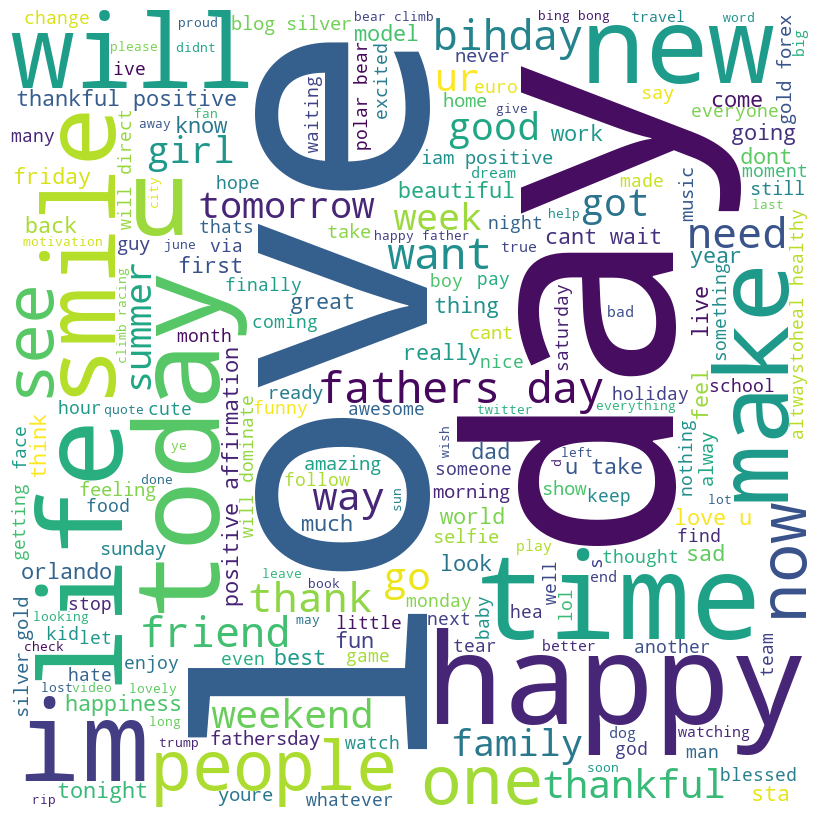

In [17]:
# Implementing Wordcloud
# WordCloud of Hate speech
from wordcloud import STOPWORDS

hate_speech = train_df[train_df['label'] == 0]   
comment_words = ''
stopwords = set(STOPWORDS)
for val in hate_speech.tweet:
     
    #typecaste each val to string
    val = str(val)
 
    #split the value
    tokens = val.split()
     
    #Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

In [18]:
#drop id column in all data sets as this will not be useful in modelling
clean_train_df= train_df.drop(columns='id')
clean_test_df = test_df.drop(columns='id')

In [19]:
#view train_set again
clean_train_df.head()

,label,tweet,cleaned_tweet
0,0,when a father is dysfunctional and is so selfi...,"[father, dysfunctional, selfish, drag, kid, dy..."
1,0,thanks for lyft credit i cant use cause they d...,"[thanks, lyft, credit, cant, use, cause, dont,..."
2,0,bihday your majesty,"[bihday, majesty]"
3,0,model i love u take with u all the time in ur,"[model, love, u, take, u, time, ur]"
4,0,factsguide society now motivation,"[factsguide, society, motivation]"


In [20]:
#view test set again
clean_test_df.head()

,tweet,cleaned_tweet
0,studiolife aislife requires passion dedication...,"[studiolife, aislife, requires, passion, dedic..."
1,white supremacists want everyone to see the ne...,"[white, supremacist, want, everyone, see, new,..."
2,safe ways to heal your acne altwaystoheal h...,"[safe, way, heal, acne, altwaystoheal, healthy..."
3,is the hp and the cursed child book up for res...,"[hp, cursed, child, book, reservation, already..."
4,rd bihday to my amazing hilarious nephew eli a...,"[rd, bihday, amazing, hilarious, nephew, eli, ..."


# Define performance metrics for model evaluation

In [21]:
# Compute performance metrics function
def compute_performance(y_true, y_pred, split='test'):
    print('Computing different performance metrics on', split, 'set of Dataset')
    f1score = f1_score(y_true, y_pred, average='macro')
    acc = accuracy_score(y_true, y_pred)

    print('F1 Score(macro): ', f1score)
    print('Accuracy: ', acc)

    cmatrix = confusion_matrix(y_true, y_pred)
    labels = np.asarray(
        [["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cmatrix.flatten().sum())]
         for item in cmatrix.flatten()]
    ).reshape(2, 2)

    # Set the title of the plot based on the input split
    plt.figure(figsize=(5, 3))
    sns.heatmap(cmatrix, annot= labels, fmt="",cbar = False)
    plt.ylabel("Actual Values")
    plt.xlabel("Predicted Values")
    if split == 'train':
        plt.title("Confusion Matrix on train set")
    else:
         plt.title("Confusion Matrix on test set")

    return f1score


# Training LSTM Model 

Data Size: 25%


C:\Users\Hp\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/5
160/160 ━━━━━━━━━━━━━━━━━━━━ 41s 186ms/step - accuracy: 0.9133 - loss: 0.3019 - val_accuracy: 0.9343 - val_loss: 0.2174
Epoch 2/5
160/160 ━━━━━━━━━━━━━━━━━━━━ 30s 186ms/step - accuracy: 0.9462 - loss: 0.1590 - val_accuracy: 0.9484 - val_loss: 0.1555
Epoch 3/5
160/160 ━━━━━━━━━━━━━━━━━━━━ 31s 194ms/step - accuracy: 0.9842 - loss: 0.0458 - val_accuracy: 0.9437 - val_loss: 0.1922
Epoch 4/5
160/160 ━━━━━━━━━━━━━━━━━━━━ 30s 186ms/step - accuracy: 0.9947 - loss: 0.0218 - val_accuracy: 0.9515 - val_loss: 0.2017
Epoch 5/5
160/160 ━━━━━━━━━━━━━━━━━━━━ 29s 184ms/step - accuracy: 0.9985 - loss: 0.0072 - val_accuracy: 0.9515 - val_loss: 0.2537
200/200 ━━━━━━━━━━━━━━━━━━━━ 13s 62ms/step
Computing different performance metrics on train set of Dataset
F1 Score(macro):  0.9582649560535451
Accuracy:  0.9898310387984981


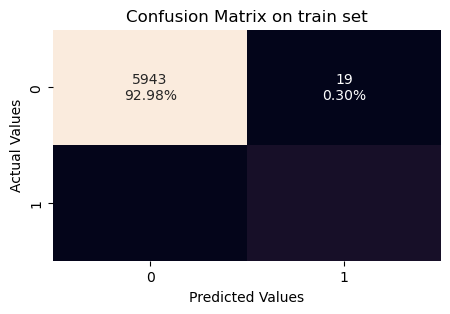

In [22]:
# Training function using LSTM
def train_method1(clean_train_df, model_dir, max_words=10000, max_len=100, embedding_dim=128):
    """
    Trains an LSTM model on the dataset.
    Saves the best model in the specified model directory.

    Args:
        train_df: DataFrame containing the training dataset.
        model_dir: Path to the model directory where the best model will be saved.
        max_words: Maximum number of words to keep based on word frequency.
        max_len: Maximum length of all sequences.
        embedding_dim: Dimension of the embedding vectors.
    """

    # Tokenize the text data
    tokenizer = Tokenizer(num_words=max_words)
    tokenizer.fit_on_texts(clean_train_df['tweet'])
    X_train = tokenizer.texts_to_sequences(clean_train_df['tweet'])
    X_train = pad_sequences(X_train, maxlen=max_len)
    y_train = clean_train_df['label']

    # Define the LSTM model
    model = Sequential()
    model.add(Embedding(input_dim=max_words, output_dim=embedding_dim, input_length=max_len))
    model.add(LSTM(128, return_sequences=True))
    model.add(Dropout(0.5))
    model.add(LSTM(128))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

    # Train the model
    model.fit(X_train, y_train, epochs=5, batch_size=32, validation_split=0.2)

    # Evaluate the model on the training data
    y_pred = (model.predict(X_train) > 0.5).astype("int32")

    # Compute performance metrics and plot the confusion matrix
    compute_performance(y_train, y_pred, split='train')

    # Save the best model to the specified model directory
    os.makedirs(model_dir, exist_ok=True)
    model_file = os.path.join(model_dir, 'lstm_model.h5')
    model.save(model_file)

    # Save the Tokenizer used to convert text to numerical features
    tokenizer_file = os.path.join(model_dir, 'tokenizer.pkl')
    with open(tokenizer_file, 'wb') as f:
        pickle.dump(tokenizer, f)

# Function to train and evaluate on multiple splits
def train_and_evaluate_splits(train_dfs, model_directory):
    for i, train_split_df in enumerate(train_dfs):
        print(f'Data Size: {int(train_sizes[i] * 100)}%')
        model_dir = os.path.join(model_directory, str(int(train_sizes[i] * 100)))
        train_method1(train_split_df, model_dir)

# Define the split sizes
train_sizes = [0.25]
train_dfs = []

# Define the stratified splitter
splitter = StratifiedShuffleSplit(n_splits=len(train_sizes), test_size=0.2, random_state=42)

# Split the data using the splitter
for size in train_sizes:
    train_idx, _ = next(splitter.split(clean_train_df, clean_train_df["label"]))
    train_split_df = clean_train_df.iloc[train_idx].sample(frac=size)
    train_dfs.append(train_split_df)

# Train and evaluate splits
train_and_evaluate_splits(train_dfs, MODEL_1_DIRECTORY)


# Testing LSTM Model

In [23]:
# Function to test the model and add predicted labels to the test DataFrame
def test_model(clean_test_df, model_file, tokenizer_file, max_len=100):
    """
    Tests the LSTM model on the test dataset.
    Adds the predicted labels to the test DataFrame and displays it.

    Args:
        test_df: DataFrame containing the test dataset.
        model_file: Path to the saved model file.
        tokenizer_file: Path to the saved tokenizer file.
        max_len: Maximum length of all sequences.
    """

    # Load the saved model and tokenizer
    model = load_model(model_file)

    # Compile the model to avoid the warning
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    with open(tokenizer_file, 'rb') as f:
        tokenizer = pickle.load(f)

    # Preprocess the test data
    X_test = tokenizer.texts_to_sequences(clean_test_df['tweet'])
    X_test = pad_sequences(X_test, maxlen=max_len)

    # Predict the labels
    y_pred_prob = model.predict(X_test)
    y_pred = (y_pred_prob > 0.5).astype("int32").flatten()

    # Add the predicted labels to the test DataFrame
    clean_test_df['predicted_label'] = y_pred

    return clean_test_df

# Define the model and tokenizer file paths
model_file = os.path.join(MODEL_1_DIRECTORY, '25', 'lstm_model.h5')
tokenizer_file = os.path.join(MODEL_1_DIRECTORY,'25', 'tokenizer.pkl')

# Test the model and display the test DataFrame with predicted labels
test_df_with_predictions = test_model(clean_test_df, model_file, tokenizer_file)
print(test_df_with_predictions)


538/538 ━━━━━━━━━━━━━━━━━━━━ 31s 56ms/step
                                                   tweet  \
0      studiolife aislife requires passion dedication...   
1      white supremacists want everyone to see the ne...   
2      safe ways to heal your acne    altwaystoheal h...   
3      is the hp and the cursed child book up for res...   
4      rd bihday to my amazing hilarious nephew eli a...   
...                                                  ...   
17192  thought factory leftright polarisation trump u...   
17193  feeling like a mermaid  hairflip neverready fo...   
17194  hillary campaigned today in ohioomg and used w...   
17195  happy at work conference right mindset leads t...   
17196  my   song so glad free download  shoegaze newm...   

                                           cleaned_tweet  predicted_label  
0      [studiolife, aislife, requires, passion, dedic...                0  
1      [white, supremacist, want, everyone, see, new,...                0  
2      [

# Training NanoGPT Model

In [ ]:
from transformers import GPT2Tokenizer, TFGPT2LMHeadModel
import tensorflow as tf
from sklearn.model_selection import StratifiedShuffleSplit

# Define the split sizes
train_sizes = [0.25]
train_dfs = []

# Define the stratified splitter
splitter = StratifiedShuffleSplit(n_splits=len(train_sizes), test_size=0.2, random_state=42)

# Split the data using the splitter
for size in train_sizes:
    train_idx, _ = next(splitter.split(clean_train_df, clean_train_df["label"]))
    train_split_df = clean_train_df.iloc[train_idx].sample(frac=size)
    train_dfs.append(train_split_df)

# Define the train_model function
def train_model(train_inputs, tokenizer, model_dir):
    model = TFGPT2LMHeadModel.from_pretrained('gpt2')
    
    optimizer = tf.keras.optimizers.Adam(learning_rate=5e-5)
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
    
    # Example training loop
    for epoch in range(3):  # Number of epochs
        for step, inputs in enumerate(train_inputs):
            with tf.GradientTape() as tape:
                outputs = model(inputs)
                logits = outputs.logits
                flat_target = tf.reshape(inputs, (-1,))
                flat_logits = tf.reshape(logits, (-1, logits.shape[-1]))
                loss_value = loss(flat_target, flat_logits)
            grads = tape.gradient(loss_value, model.trainable_variables)
            optimizer.apply_gradients(zip(grads, model.trainable_variables))
    
    # Save the model
    model.save_pretrained(model_dir)

# Main function
def main():
    # Specify your model directory
    model_dir = MODEL_2_DIRECTORY
    
    # Initialize tokenizer
    tokenizer = GPT2Tokenizer.from_pretrained("gpt2")
    tokenizer.pad_token = tokenizer.eos_token
    
    # Iterate over train_dfs and train the model on each split
    for idx, train_df in enumerate(train_dfs):
        # Extract preprocessed text data
        dataset = clean_train_df['tweet'].tolist()  # Assuming 'tweet' is the column with preprocessed text
        
        # Tokenize the dataset
        train_inputs = tokenizer(dataset, return_tensors="tf", padding=True, truncation=True)
        
        # Train the model
        train_model(train_inputs['input_ids'], tokenizer, f"{model_dir}/split_{idx}")

if __name__ == "__main__":
    main()


All PyTorch model weights were used when initializing TFGPT2LMHeadModel.

All the weights of TFGPT2LMHeadModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFGPT2LMHeadModel for predictions without further training.


# Testing NanoGPT Model

In [ ]:
from keras.models import load_model
from keras.preprocessing.sequence import pad_sequences

def test_model(clean_test_df, model_file, tokenizer_file, max_len=100):
    # Load the saved model and tokenizer
    model = load_model(model_file)
    with open(tokenizer_file, 'rb') as f:
        tokenizer = pickle.load(f)

    # Tokenize the text data
    X_test = tokenizer.texts_to_sequences(clean_test_df['tweet'])
    X_test = pad_sequences(X_test, maxlen=max_len)

    # Make predictions
    y_pred = (model.predict(X_test) > 0.5).astype("int32")
    clean_test_df['predicted_label'] = y_pred

    return clean_test_df

# Specify the directories and files
model_file = os.path.join(MODEL_2_DIRECTORY, '25', 'lstm_model.h5')
TOKENIZER_FILE = os.path.join(MODEL_2_DIRECTORY,'25', 'tokenizer.pkl')

# Test the model and display the test DataFrame with predicted labels
test_df_with_predictions = test_model(clean_test_df, MODEL_FILE, TOKENIZER_FILE)
print(test_df_with_predictions)
